The first 10 values of raw audio data :
[-0.00033569 -0.00042725 -0.0005188  -0.00042725 -0.0005188  -0.00042725
 -0.0005188  -0.00042725 -0.00042725 -0.0005188 ]
The Dimensions of the Audio : 
(176400,)
Sample Rate : 44100
Dimensions of spectrogram:
(128, 345)
<class 'numpy.ndarray'>


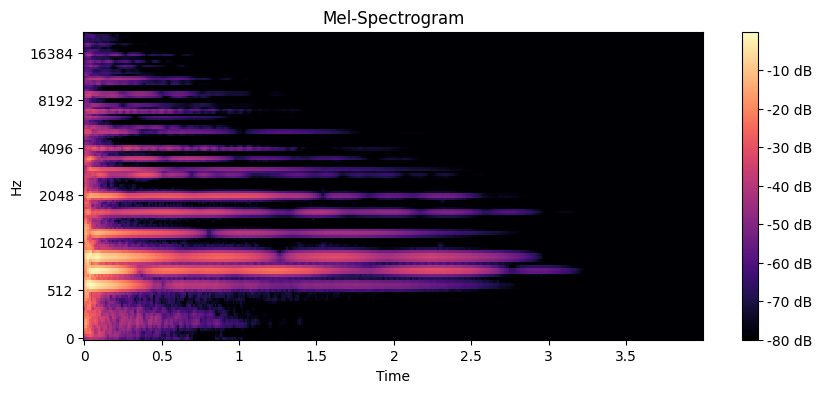

In [1]:
import numpy as np
import matplotlib.pylab as plt
import librosa

audio_file_path = './data/major/A_Major_inversion_13.wav'

raw_data, sample_rate = librosa.load(audio_file_path, sr=None)  # sr=None keeps the original sample rate

print("The first 10 values of raw audio data :")
print(raw_data[:10])

print("The Dimensions of the Audio : ")
print(raw_data.shape)

print("Sample Rate : " + str(sample_rate))

# convert the data into spectrogram and then convert to decibels dB
spectrogram = librosa.feature.melspectrogram(y=raw_data, sr=sample_rate, n_mels=128, fmax=8000)
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

print("Dimensions of spectrogram:")
print(spectrogram_db.shape)
print(type(spectrogram_db))

# Plot the spectrogram using librosa's display module
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram_db, x_axis='time', y_axis='mel', sr=sample_rate)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.show()



In [ ]:
# PREPARING TRAINING DATA

from DataPreparation import prepare_dataset

train_data, train_labels, val_data, val_labels, test_data, test_labels = prepare_dataset('./data')

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
val_labels = label_encoder.fit_transform(val_labels)
test_labels = label_encoder.fit_transform(test_labels)


Dimensions of Training Data:
(128, 173)
<class 'numpy.ndarray'>
(128, 173)
<class 'numpy.ndarray'>
(128, 173)
<class 'numpy.ndarray'>
(128, 173)
<class 'numpy.ndarray'>
(128, 173)
<class 'numpy.ndarray'>
(128, 173)
<class 'numpy.ndarray'>
(128, 173)
<class 'numpy.ndarray'>
(128, 173)
<class 'numpy.ndarray'>
(128, 173)
<class 'numpy.ndarray'>
(128, 173)
<class 'numpy.ndarray'>
(128, 173)
<class 'numpy.ndarray'>
(128, 173)
<class 'numpy.ndarray'>
(128, 173)
<class 'numpy.ndarray'>
(128, 173)
<class 'numpy.ndarray'>
(128, 173)
<class 'numpy.ndarray'>
(128, 173)
<class 'numpy.ndarray'>
(128, 173)
<class 'numpy.ndarray'>
(128, 173)
<class 'numpy.ndarray'>
(128, 173)
<class 'numpy.ndarray'>
(128, 173)
<class 'numpy.ndarray'>
(128, 173)
<class 'numpy.ndarray'>
(128, 173)
<class 'numpy.ndarray'>
(128, 173)
<class 'numpy.ndarray'>
(128, 173)
<class 'numpy.ndarray'>
(128, 173)
<class 'numpy.ndarray'>
(128, 173)
<class 'numpy.ndarray'>
(128, 173)
<class 'numpy.ndarray'>
(128, 173)
<class 'numpy.n

In [5]:
print("Dimensions of Training Data:")
for data in train_data:
    print(data.shape)
    print(data)

Dimensions of Training Data:
(128, 173)
[[0.45446262 0.56211054 0.6277553  ... 0.         0.         0.        ]
 [0.5331271  0.59865665 0.66841054 ... 0.         0.         0.        ]
 [0.5717033  0.5686899  0.5948508  ... 0.         0.         0.        ]
 ...
 [0.39148897 0.37549084 0.35151592 ... 0.         0.         0.        ]
 [0.3889923  0.35490885 0.27114797 ... 0.         0.         0.        ]
 [0.37882814 0.3440625  0.26694518 ... 0.         0.         0.        ]]
(128, 173)
[[0.52061963 0.5831449  0.61355555 ... 0.11315136 0.13189535 0.20201111]
 [0.6236407  0.6619439  0.65912724 ... 0.10974427 0.12125931 0.23754187]
 [0.6896753  0.72224987 0.67750365 ... 0.12152071 0.16140966 0.26562482]
 ...
 [0.16360912 0.14491253 0.         ... 0.         0.         0.09452667]
 [0.13273326 0.10889301 0.         ... 0.         0.         0.08847789]
 [0.0878664  0.0666893  0.         ... 0.         0.         0.08515863]]
(128, 173)
[[0.56675565 0.5886346  0.6049739  ... 0.         

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from Model import create_cnn_model 

model = create_cnn_model(train_data)
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels, epochs=100, batch_size=32, verbose=1, validation_data=(val_data, val_labels))

Epoch 1/100


c:\Users\Chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.5339 - loss: 0.7894 - val_accuracy: 0.5652 - val_loss: 0.6931
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.4974 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.4997 - loss: 0.6931 - val_accuracy: 0.4565 - val_loss: 0.6932
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.4534 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.4940 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.5213 - loss: 0.6933 - val_accuracy: 0.4130 - val_loss: 0.6938
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.4859 - loss: 0.6930 - val_accuracy: 0.4783 - val_loss: 0.6936
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.5118 - loss: 0.6928 - val_accuracy: 0.4130 - val_l

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 171, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 83, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 41, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 39, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 34048)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,358,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,353,221 (50.94 MB)

 Trainable params: 4,451,073 (16.98 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,902,148 (33.96 MB)

2/2 - 0s - 23ms/step - accuracy: 0.4130 - loss: 4.0011


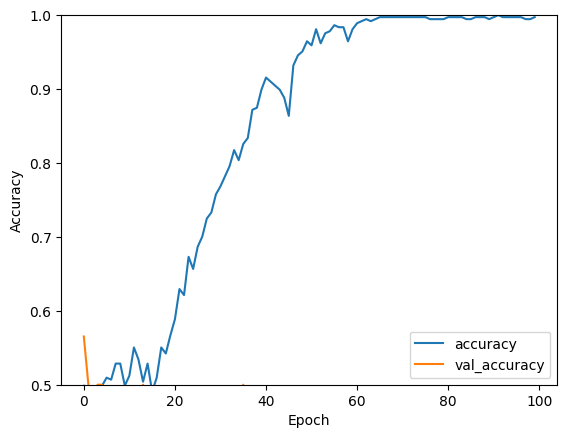

In [6]:
model.summary()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)